Epoch 1: Loss 0.3689, Accuracy 0.6100
Epoch 2: Loss 0.0308, Accuracy 0.9600
Epoch 3: Loss 0.0200, Accuracy 0.9800
Epoch 4: Loss 0.0143, Accuracy 0.9800
Epoch 5: Loss 0.0105, Accuracy 0.9900


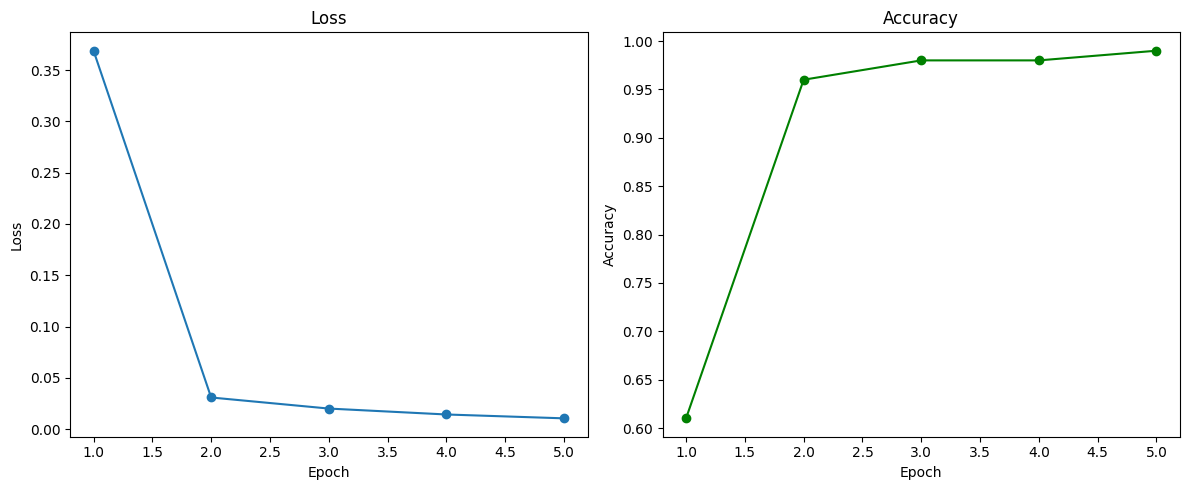

In [14]:
# Kode Python untuk Single Layer Perceptron Tanpa Pemisahan Training & Validasi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Import data dari Google Sheet.
url = 'https://docs.google.com/spreadsheets/d/1bD8um1nVRBhGc50hPtKKE694H77_JTzaaT7dPLa6CIE/export?format=csv'
data = pd.read_csv(url, header=None, decimal=',')

# Ekstrak fitur dan label.
X = data.iloc[:, 0:4].values  # 4 fitur
y_str = data.iloc[:, 4].values  # Label string
y = np.where(y_str == 'Iris-setosa', 0, 1)  # 0 untuk setosa, 1 untuk versicolor

# Tambahkan bias (kolom 1 di depan).
X = np.c_[np.ones(X.shape[0]), X]

# Inisialisasi weights (bias + theta1 sampai theta4) dengan 0.5.
weights = np.array([0.5] * X.shape[1])

# Hyperparameters.
lr = 0.1
epochs = 5

# Fungsi sigmoid.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# List untuk simpan loss (mean MSE) dan accuracy per epoch.
losses = []
accuracies = []

for epoch in range(epochs):
    mse_sum = 0  # Sum untuk hitung mean MSE
    correct = 0  # Hitung jumlah prediksi benar

    for i in range(len(y)):
        # Forward pass.
        z = np.dot(X[i], weights)
        pred = sigmoid(z)

        # Hitung error dan tambah ke mse_sum.
        error = pred - y[i]
        mse_sum += error ** 2

        # Prediksi kelas (threshold 0.5).
        pred_class = 1 if pred >= 0.5 else 0
        if pred_class == y[i]:
            correct += 1

        # Gradient untuk MSE: 2 * error * pred * (1 - pred) * X[i]
        gradient = 2 * error * pred * (1 - pred) * X[i]

        # Update weights (SGD: update per sample).
        weights -= lr * gradient

    # Hitung mean loss dan accuracy untuk epoch ini.
    loss = mse_sum / len(y)
    acc = correct / len(y)

    losses.append(loss)
    accuracies.append(acc)

    # Print progress.
    print(f"Epoch {epoch+1}: Loss {loss:.4f}, Accuracy {acc:.4f}")

# Langkah akhir: Visualisasi Loss dan Accuracy.
plt.figure(figsize=(12, 5))

# Plot Loss.
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), losses, marker='o')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot Accuracy.
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), accuracies, marker='o', color='green')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

Epoch 1: Train Loss 0.4390, Train Acc 0.5125, Val Loss 0.1704, Val Acc 0.5000
Epoch 2: Train Loss 0.0570, Train Acc 0.9875, Val Loss 0.0283, Val Acc 1.0000
Epoch 3: Train Loss 0.0185, Train Acc 1.0000, Val Loss 0.0127, Val Acc 1.0000
Epoch 4: Train Loss 0.0115, Train Acc 1.0000, Val Loss 0.0076, Val Acc 1.0000
Epoch 5: Train Loss 0.0083, Train Acc 1.0000, Val Loss 0.0054, Val Acc 1.0000


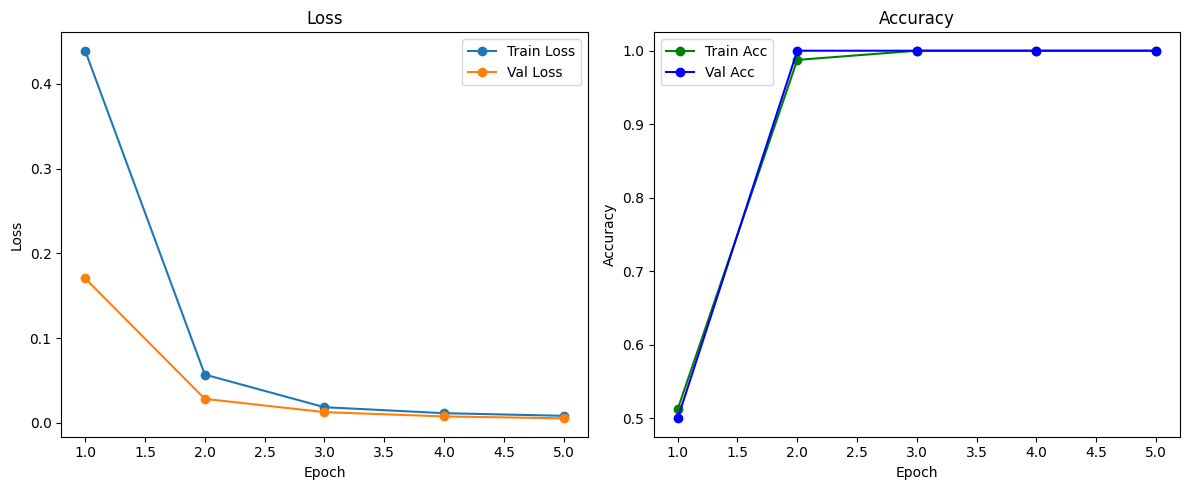

In [16]:
# Kode Python untuk Single Layer Perceptron dengan Training  & Validasi 80:20
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import data dari Google Sheet.
url = 'https://docs.google.com/spreadsheets/d/1t0mDY1qz88hqePIkho2obuh_ojNa2XWvrotDLj53b6U/export?format=csv'
data = pd.read_csv(url, header=None, decimal=',')

# Ekstrak fitur dan label.
X = data.iloc[:, 0:4].values  # 4 fitur
y_str = data.iloc[:, 4].values  # Label
y = np.where(y_str == 'Iris-setosa', 0, 1)

# Split data: 80% train, 20% validation.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tambahkan bias.
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_val = np.c_[np.ones(X_val.shape[0]), X_val]

# Inisialisasi weights.
weights = np.array([0.5] * X_train.shape[1])

# Hyperparameters.
lr = 0.1
epochs = 5

# Fungsi sigmoid.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# List untuk simpan metrics.
train_losses, train_accs, val_losses, val_accs = [], [], [], []

for epoch in range(epochs):
    mse_sum, correct = 0, 0

    # Training loop (SGD).
    for i in range(len(y_train)):
        z = np.dot(X_train[i], weights)
        pred = sigmoid(z)
        error = pred - y_train[i]
        mse_sum += error ** 2
        pred_class = 1 if pred >= 0.5 else 0
        if pred_class == y_train[i]:
            correct += 1
        gradient = 2 * error * pred * (1 - pred) * X_train[i]
        weights -= lr * gradient

    # Training metrics.
    train_loss = mse_sum / len(y_train)
    train_acc = correct / len(y_train)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation metrics.
    val_mse_sum, val_correct = 0, 0
    for i in range(len(y_val)):
        z = np.dot(X_val[i], weights)
        pred = sigmoid(z)
        error = pred - y_val[i]
        val_mse_sum += error ** 2
        pred_class = 1 if pred >= 0.5 else 0
        if pred_class == y_val[i]:
            val_correct += 1
    val_loss = val_mse_sum / len(y_val)
    val_acc = val_correct / len(y_val)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss {train_loss:.4f}, Train Acc {train_acc:.4f}, Val Loss {val_loss:.4f}, Val Acc {val_acc:.4f}")

# Visualisasi.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, marker='o', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accs, marker='o', label='Train Acc', color='green')
plt.plot(range(1, epochs+1), val_accs, marker='o', label='Val Acc', color='blue')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()